# Workforce flow. EDA of received employees from LinkedIn

## Loading data

In [60]:
!pip install googletrans==4.0.0-rc1

In [61]:
!pip install gender-guesser

In [52]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from googletrans import Translator
import re
import requests

In [2]:
# Read dataset with 100 collected users for each file
root = 'users'
users_0_100 = pd.read_csv(f'{root}/users_0_100.csv')
users_100_200 = pd.read_csv(f'{root}/users_100_200.csv')
users_200_300 = pd.read_csv(f'{root}/users_200_300.csv')
users_300_400 = pd.read_csv(f'{root}/users_300_400.csv')
users_400_500 = pd.read_csv(f'{root}/users_400_500.csv')

In [3]:
# Concatenate all dataframes into one common users dataframe
users = pd.concat([users_0_100, users_100_200, users_200_300, users_300_400, users_400_500], ignore_index=True)

In [4]:
users.head()

,search_term,id,urn,profile_link,profile_id,name,first_name,last_name,location,headline,...,emails_in_bio,potential_emails,profile_photo,banner_photo,connection_created_at,connection_email,connection_phone_numbers,connection_websites,connection_street_address,connection_birthday
0,manual,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,266161080,https://www.linkedin.com/in/ACoAAA_dS7gB-ucqa7...,roberto-enrique-chavez-rodriguez-4a017875,Roberto Enrique Chavez Rodriguez,Roberto Enrique,Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",Software Engineer at the Center of Oil and Gas...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4E03AQFZ...,https://media.licdn.com/dms/image/v2/C4E16AQF5...,NaN,NaN,[],[],NaN,May 29
1,manual,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,265756375,https://www.linkedin.com/in/ACoAAA_XHtcBA0rpWC...,maxim-shalavin,Maxim Shalavin,Maxim,Shalavin,"Tbilisi, Georgia",Team Lead | Senior Golang Developer | Blockcha...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/D4D03AQEQ...,https://media.licdn.com/dms/image/v2/D4D16AQEq...,NaN,NaN,[],['https://github.com/sansaian'],NaN,NaN
2,manual,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,260311431,https://www.linkedin.com/in/ACoAAA-ECYcB5_w3-S...,zaplatinaolga,Olga Z.,Olga,Z.,"Kazan, Tatarstan, Russia",Project management | internal communications |...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4E03AQHl...,https://media.licdn.com/dms/image/v2/C4E16AQHR...,NaN,NaN,[],[],NaN,August 30
3,manual,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,221535739,https://www.linkedin.com/in/ACoAAA00XfsBNdzmLH...,fazullin,Timur Fazullin,Timur,Fazullin,"Innopolis, Tatarstan, Russia",Head of Communications and Branding,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4D03AQFF...,NaN,NaN,NaN,[],['https://fazullin.site/'],NaN,NaN
4,manual,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,218667241,https://www.linkedin.com/in/ACoAAA0ImOkB2Ninxe...,vasiliizorin,Vasilii Zorin,Vasilii,Zorin,"Toronto, Ontario, Canada",Lead Product Manager at Acronis,...,NaN,NaN,https://media.licdn.com/dms/image/v2/D4D03AQHz...,NaN,NaN,NaN,[],[],NaN,May 12


## General information

In [66]:
# Show general info about dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   search_term                500 non-null    object 
 1   id                         500 non-null    object 
 2   urn                        500 non-null    int64  
 3   profile_link               500 non-null    object 
 4   profile_id                 500 non-null    object 
 5   name                       500 non-null    object 
 6   first_name                 500 non-null    object 
 7   last_name                  500 non-null    object 
 8   location                   499 non-null    object 
 9   headline                   497 non-null    object 
 10  estimated_age              481 non-null    float64
 11  followers                  500 non-null    int64  
 12  connections                500 non-null    int64  
 13  mutuals                    500 non-null    int64  

In [67]:
users.describe()

,urn,estimated_age,followers,connections,mutuals,potential_emails,connection_street_address,num_languages
count,5.000000e+02,481.000000,500.000000,500.000000,500.000000,0.0,0.0,500.000000
mean,4.299456e+08,32.945946,916.914000,894.636000,0.360000,NaN,NaN,1.842000
std,2.085065e+08,7.064671,1415.511997,1375.536999,0.492834,NaN,NaN,1.594403
min,4.328100e+05,18.000000,6.000000,6.000000,0.000000,NaN,NaN,0.000000
25%,2.865633e+08,28.000000,244.500000,238.500000,0.000000,NaN,NaN,0.000000
50%,4.374636e+08,31.000000,506.000000,496.000000,0.000000,NaN,NaN,2.000000
75%,5.579041e+08,37.000000,984.750000,982.500000,1.000000,NaN,NaN,3.000000
max,8.044436e+08,72.000000,12561.000000,12629.000000,2.000000,NaN,NaN,9.000000


In [69]:
# Check duplicated urns in dataset
users['urn'].duplicated().sum()

0

In [70]:
# Check duplicated profile_id in dataset
users.duplicated(subset='profile_id').sum()

0

We checked the dataset for duplicated rows and profile IDs. The results confirmed that **all profiles are unique**, with no repetitions.

In [71]:
# Calculate percentage of missing values in all columns
for column in users.columns:
    missing_percentage = (users[column].isnull().sum() / users.shape[0]) * 100
    print(f'Percentage of missing values in \'{column}\' column: {round(missing_percentage, 3)}%')

Percentage of missing values in 'search_term' column: 0.0%
Percentage of missing values in 'id' column: 0.0%
Percentage of missing values in 'urn' column: 0.0%
Percentage of missing values in 'profile_link' column: 0.0%
Percentage of missing values in 'profile_id' column: 0.0%
Percentage of missing values in 'name' column: 0.0%
Percentage of missing values in 'first_name' column: 0.0%
Percentage of missing values in 'last_name' column: 0.0%
Percentage of missing values in 'location' column: 0.2%
Percentage of missing values in 'headline' column: 0.6%
Percentage of missing values in 'estimated_age' column: 3.8%
Percentage of missing values in 'followers' column: 0.0%
Percentage of missing values in 'connections' column: 0.0%
Percentage of missing values in 'mutuals' column: 0.0%
Percentage of missing values in 'is_connection' column: 0.0%
Percentage of missing values in 'premium' column: 0.0%
Percentage of missing values in 'creator' column: 0.0%
Percentage of missing values in 'influen

A detailed analysis of the dataset showed that five columns—**'connection_street_address'**, **'connection_email'**, **'connection_created_at'**, **'potential_emails'**, and **'emails_in_bio'**—have missing values exceeding 98%. This means that the vast majority of entries in these columns are empty or contain null values.

A high percentage of missing values in these columns may be due to privacy concerns. People may be reluctant to share sensitive personal information such as emails and street addresses because of privacy concerns or fear of misuse (e.g. spam, data leakage).

## User information analysis

### Gender

We don't have the gender of the user, but we do have names. So we will use the **gender-guesser** for determining gender by name to analyze it.

In [72]:
import gender_guesser.detector as gender

# Initialize the gender detector
d = gender.Detector()

# Predict gender
genders = [d.get_gender(name.split()[0]) for name in users['first_name']]
genders

['male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'unknown',
 'male',
 'unknown',
 'male',
 'unknown',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'unknown',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'unknown',
 'male',
 'unknown',
 'male',
 'male',
 'male',
 'male',
 'unknown',
 'male',
 'unknown',
 'unknown',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'unknown',
 'male',
 'unknown',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'm

In [57]:
users['gender'] = genders
users.groupby('gender')['profile_id'].count()

,profile_id
gender,
andy,1
female,71
male,344
mostly_female,1
unknown,83


This output represents the **gender distribution** of names in our dataset after applying a gender detection method.

| **Gender Label**     | **Count** | **Explanation** |
|----------------------|----------|--------------------------------------------------|
| **male**            | 344      | 344 people were identified as **male**. |
| **female**          | 71       | 71 people were identified as **female**. |
| **andy**            | 1        | 1 person had a name that is **perfectly androgynous** (used equally by males and females). |
| **mostly_female**   | 1        | 1 person had a name that is **usually female** but may also be used for males. |
| **unknown**         | 83       | 83 names could not be classified (e.g., rare names, initials, non-standard formats). |

### Location

In [73]:
users['location'].unique()

array(['Buenos Aires, Buenos Aires Province, Argentina',
       'Tbilisi, Georgia', 'Kazan, Tatarstan, Russia',
       'Innopolis, Tatarstan, Russia', 'Toronto, Ontario, Canada',
       'Stockholm, Stockholm County, Sweden',
       'San Francisco, California, United States',
       'Amsterdam, North Holland, Netherlands',
       'St Petersburg, St Petersburg City, Russia',
       'Moscow, Moscow City, Russia', 'Russia',
       'Chicago, Illinois, United States', 'Tatarstan, Russia',
       'Makhachkala, Dagestan, Russia',
       'Schaffhausen, Schaffhausen, Switzerland',
       'Pittsburgh, Pennsylvania, United States',
       'Oudenbosch, North Brabant, Netherlands', 'İzmir, Türkiye',
       'Lille, Hauts-de-France, France', 'Munich, Bavaria, Germany',
       'Faisalabad, Punjab, Pakistan',
       'Büsingen, Baden-Württemberg, Germany', 'Luxembourg',
       'Zurich, Switzerland', 'United States', 'Bashkortostan, Russia',
       'Portland, Oregon, United States',
       'Greater Paris 

We can notice that country is the last item in location. Therefore, we can extract it and analyse our users by country.

In [74]:
# Extract from location country information
users['country'] = [location[-1] if type(location)==list else "" for location in users['location'].str.split(', ')]

In [75]:
# Show number of unique countries
len(users['country'].unique())

75

In [76]:
# Show top 10 countries using number of users in each country
users.groupby('country')['profile_id'].count().sort_values(ascending=False).head(10)

,profile_id
country,
Russia,204
Germany,26
United Kingdom,23
United Arab Emirates,18
United States,17
Kazakhstan,17
Netherlands,14
Serbia,13
Georgia,12


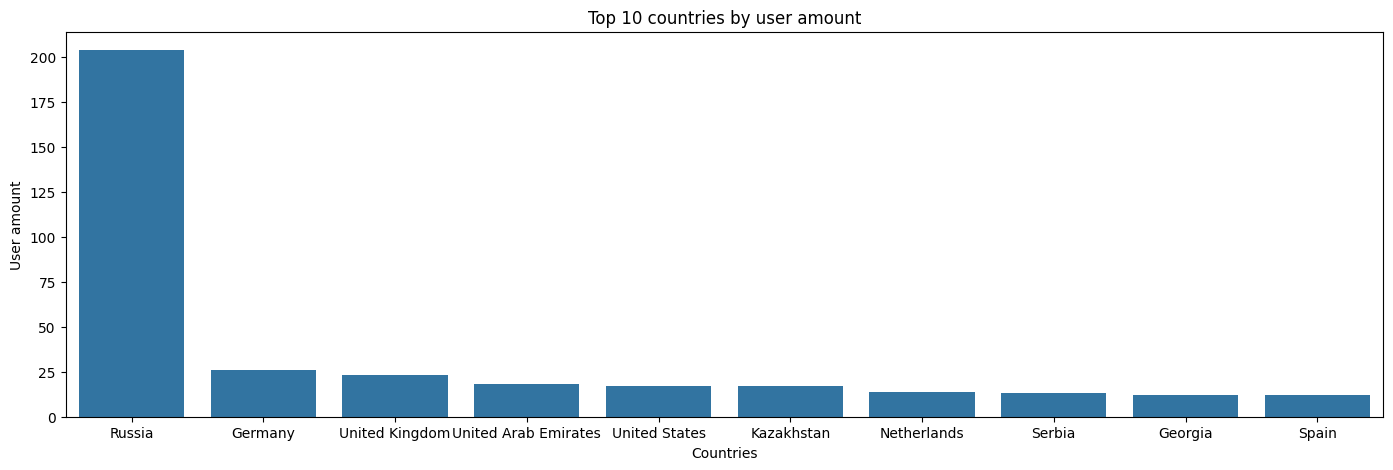

In [77]:
# Plot these 10 countries
fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(users.groupby('country')['profile_id'].count().sort_values(ascending=False).head(10))
plt.xlabel('Countries')
plt.ylabel('User amount')
plt.title('Top 10 countries by user amount')
plt.show()

The most popular country is Russia.

### Estimated age

In [62]:
users['estimated_age'].mean()

32.945945945945944

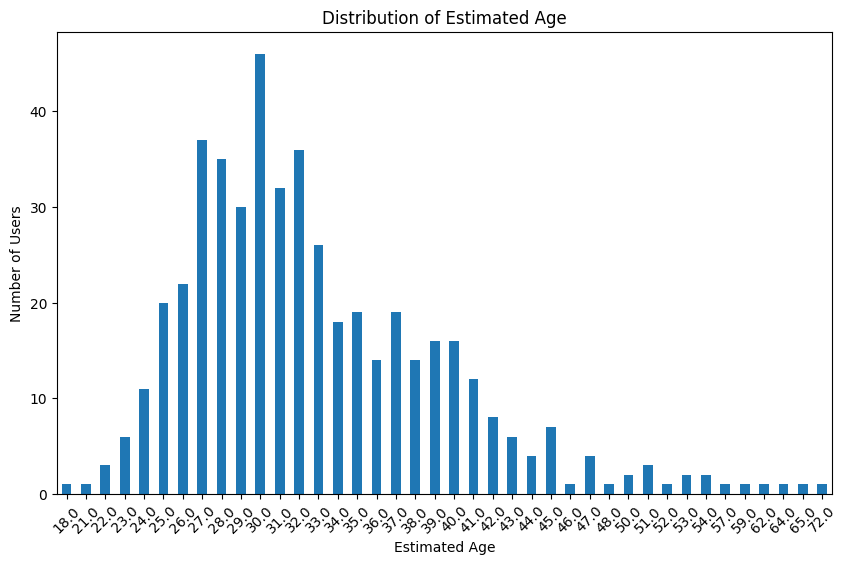

In [63]:
# Plot bars for estimated_age using number of users
plt.figure(figsize=(10, 6))
users['estimated_age'].value_counts().sort_index().plot.bar(rot=45)
plt.title('Distribution of Estimated Age')
plt.xlabel('Estimated Age')
plt.ylabel('Number of Users')
plt.show()

In [64]:
# Calculate the percentage of people from 27 to 37 ages
start_age = 27
end_age = 37
users_slice = users['estimated_age'][(users['estimated_age'] >= start_age) & (users['estimated_age'] <= end_age)].count()/users['estimated_age'][users['estimated_age'] > 0].count() * 100
users_slice

64.86486486486487

We can see that more than half of our dataset contain people from 27 to 37 ages.

In [65]:
users.groupby('gender')['estimated_age'].mean()

,estimated_age
gender,
andy,28.000000
female,32.656716
male,33.033233
mostly_female,34.000000
unknown,32.876543


### Language

In [43]:
# Check the language format
users['languages'].unique()

array(["['English', 'Russian', 'Spanish']", "['English', 'Русский']",
       "['Английский', 'Русский']", '[]',
       "['English', 'German', 'Russian']",
       "['English', 'German', 'Russian', 'Swedish']",
       "['Английский', 'Башкирский', 'Русский', 'Татарский']",
       "['English', 'Russian']", "['Dutch', 'English', 'French']",
       "['English']", "['Английский язык', 'Немецкий']",
       "['English', 'Romanian', 'Russian', 'Turkish']",
       "['English', 'Japanese', 'Russian', 'Ukrainian']",
       "['Английский', 'Татарский']", "['Английский']",
       "['English', 'French', 'Russian']",
       "['Arabic', 'English', 'Punjabi', 'Urdu']",
       "['Arabic', 'English']",
       "['English', 'French', 'German', 'Russian']",
       "['English', 'French']",
       "['English', 'French', 'German', 'Italian', 'Russian']",
       "['English', 'French', 'Russian', 'Yemba']",
       "['English', 'Portuguese', 'Russian']",
       "['English', 'French', 'German', 'Greek, Ancient (to 

In [44]:
# Calculate emply fields
len(users[users['languages']=='[]'])

170

The languages in the dataset are stored in **different formats** and in **different languages**, making it difficult to analyze. To ensure accurate statistics, we must first standardize the data by translating all records into a common language, such as **English**. In addition, we need to remove unnecessary details such as language proficiency levels or additional annotations.

In [45]:
users['languages'].head(10)

,languages
0,"['English', 'Russian', 'Spanish']"
1,"['English', 'Русский']"
2,"['Английский', 'Русский']"
3,[]
4,"['English', 'German', 'Russian']"
5,"['English', 'German', 'Russian', 'Swedish']"
6,"['Английский', 'Башкирский', 'Русский', 'Татар..."
7,"['English', 'Russian']"
8,"['English', 'Russian', 'Spanish']"
9,"['Dutch', 'English', 'French']"


In [46]:
# Initialize the translator
translator = Translator()

# Function to translate text to English
def translate_to_english(text):
    try:
        return translator.translate(text, dest='en').text
    except:
        return text  # Return the original text if translation fails

# Apply the function to the 'languages' column
translated_languages = users['languages'].apply(translate_to_english)
translated_languages.head(10)


,languages
0,"['English', 'Russian', 'Spanish']"
1,"['English', 'Russian']"
2,"['English', 'Russian']"
3,[]
4,"['English', 'German', 'Russian']"
5,"['English', 'German', 'Russian', 'Swedish']"
6,"['English', 'Bashkir', 'Russian', 'Tatar']"
7,"['English', 'Russian']"
8,"['English', 'Russian', 'Spanish']"
9,"['Dutch', 'English', 'French']"


In [47]:
# Regular expression to match only languages with '
pattern = r"'\w+"

# Extract languages as list for each user
users['translated_languages'] = [[re.sub(r"'", "", word) for word in re.findall(pattern, text)] for text in translated_languages]
users['translated_languages'].head(10)

,translated_languages
0,"[English, Russian, Spanish]"
1,"[English, Russian]"
2,"[English, Russian]"
3,[]
4,"[English, German, Russian]"
5,"[English, German, Russian, Swedish]"
6,"[English, Bashkir, Russian, Tatar]"
7,"[English, Russian]"
8,"[English, Russian, Spanish]"
9,"[Dutch, English, French]"


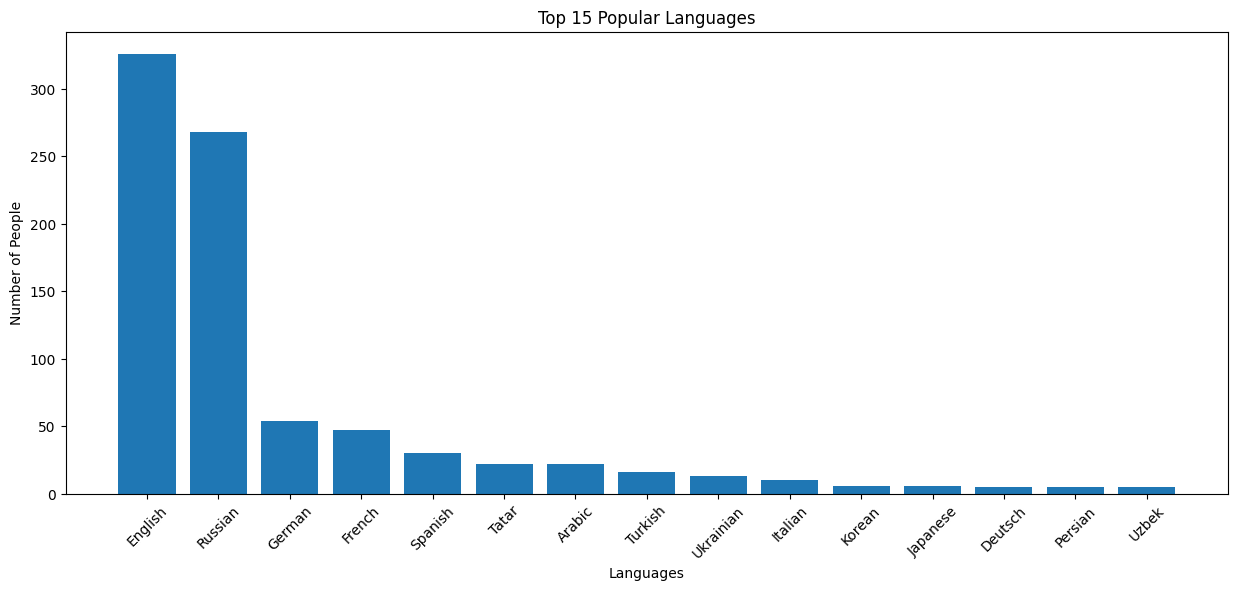

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Flatten the list of languages
all_languages = [lang for sublist in users['translated_languages'] for lang in sublist]

# Count occurrences of each language
language_counts = Counter(all_languages)

# Convert to DataFrame for plotting
lang_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])
lang_df = lang_df.sort_values(by="Count", ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(lang_df['Language'].iloc[:15], lang_df['Count'].iloc[:15])
plt.xlabel("Languages")
plt.ylabel("Number of People")
plt.title("Top 15 Popular Languages")
plt.xticks(rotation=45)
plt.show()

In [49]:
lang_df.head(15)

,Language,Count
0,English,326
1,Russian,268
3,German,54
8,French,47
2,Spanish,30
6,Tatar,22
13,Arabic,22
10,Turkish,16
12,Ukrainian,13
16,Italian,10


This table shows the number of people speaking each language in the dataset. The most common languages are **English** and **Russian**, indicating that a significant proportion of the dataset consists of people who speak these two languages.

Additionally, **German**, **French** and **Spanish** are relatively common, indicating that European languages are widely represented in the dataset. Moreover, languages such as **Tatar**, **Arabic** and **Turkish** show representation from different linguistic and cultural groups.

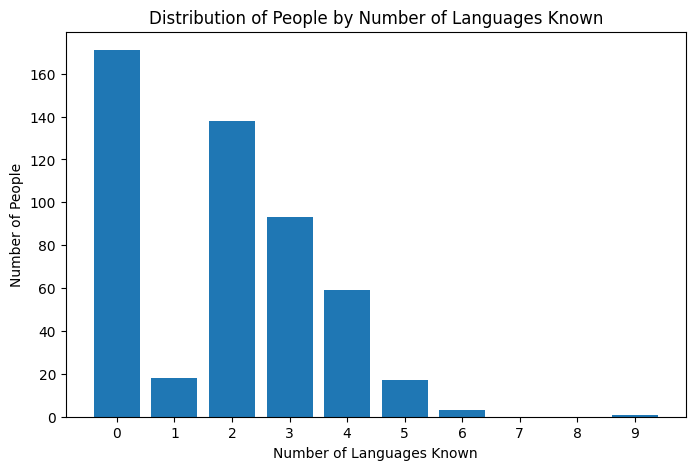

In [50]:
# Count how many languages each person knows
users['num_languages'] = users['translated_languages'].apply(len)

# Count occurrences of each unique number of languages
language_count_distribution = users['num_languages'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(language_count_distribution.index, language_count_distribution.values)

# Labels
plt.xlabel("Number of Languages Known")
plt.ylabel("Number of People")
plt.title("Distribution of People by Number of Languages Known")
plt.xticks(range(language_count_distribution.index.max()+1))

plt.show()

In [51]:
language_count_distribution

,count
num_languages,
0,171
1,18
2,138
3,93
4,59
5,17
6,3
9,1


These data suggest that most people in the dataset are at least **bilingual** or **trilingual**, reflecting a multilingual community. However, as the number of languages increases, fewer people fall into each category, which is in line with expectations - fluency in many languages is increasingly rare.

In [59]:
users.groupby('gender')['num_languages'].mean()

,num_languages
gender,
andy,0.000000
female,1.957746
male,1.869186
mostly_female,0.000000
unknown,1.674699


### Connections and followers

On LinkedIn, **followers** and **connections** are both ways people can stay updated with your activity, but there are key differences:

- **Connections -> Mutual Relationship:** Connections on LinkedIn are mutual, meaning both people agree to connect with each other. When you send a connection request and it's accepted, you're "connected."
- **Followers -> One-way Relationship:** Followers are one-sided. You don’t need to approve a follower, and they don’t need to approve you. Anyone can follow you (unless your account settings are private) to see your updates and posts

In [78]:
users[['followers', 'connections']].describe()

,followers,connections
count,500.000000,500.000000
mean,916.914000,894.636000
std,1415.511997,1375.536999
min,6.000000,6.000000
25%,244.500000,238.500000
50%,506.000000,496.000000
75%,984.750000,982.500000
max,12561.000000,12629.000000


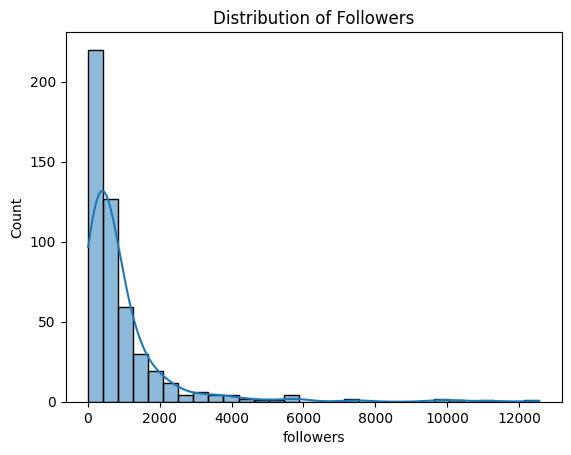

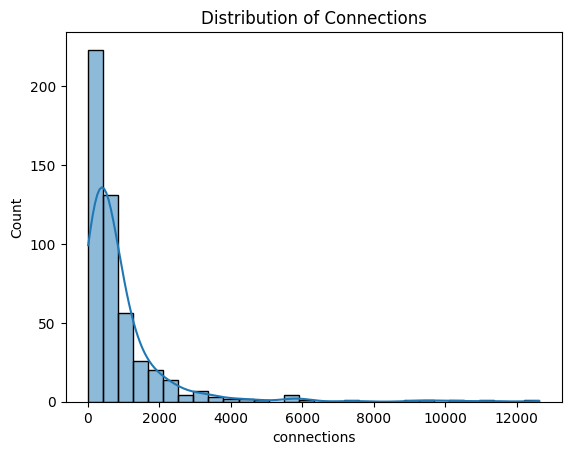

In [79]:
# Followers distribution
sns.histplot(users['followers'], bins=30, kde=True)
plt.title('Distribution of Followers')
plt.show()

# Connections distribution
sns.histplot(users['connections'], bins=30, kde=True)
plt.title('Distribution of Connections')
plt.show()

**'followers'** and **'connections'** have strong correlation. A strong correlation means when connections grow, followers are also likely to grow—and vice versa—because both groups interact with your content and expand your reach.

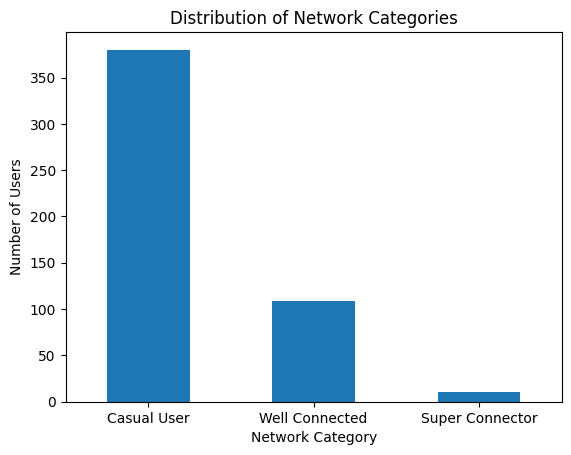

In [80]:
# Categorize users by network size
def categorize_network(row):
    if row['connections'] > 5000:
        return 'Super Connector'
    elif row['connections'] > 1000:
        return 'Well Connected'
    else:
        return 'Casual User'

users['network_category'] = users.apply(categorize_network, axis=1)
users['network_category'].value_counts().plot.bar(rot=0)
plt.title('Distribution of Network Categories')
plt.ylabel('Number of Users')
plt.xlabel('Network Category')
plt.show()

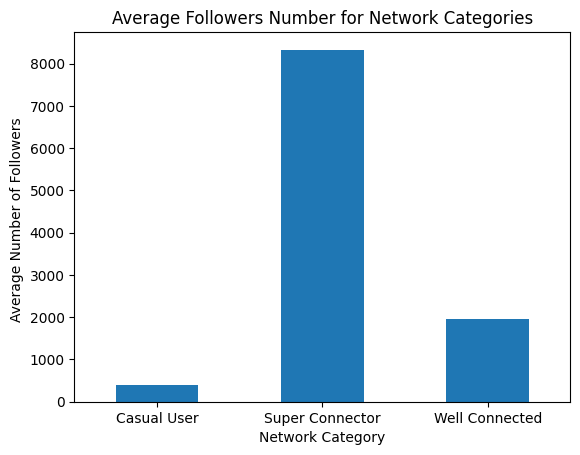

In [81]:
# Plot mean value of followers for each network category
users.groupby('network_category')['followers'].mean().plot.bar(rot=0)
plt.title('Average Followers Number for Network Categories')
plt.ylabel('Average Number of Followers ')
plt.xlabel('Network Category')
plt.show()

### Ways to communicate

In [82]:
users['connection_phone_numbers'].unique()

array(['[]'], dtype=object)

We do not have phone numbers, however we have links to githubs, articles in researchgate, medium accounts, and others.

In [83]:
users['connection_websites'].unique()

array(['[]', "['https://github.com/sansaian']",
       "['https://fazullin.site/']", "['http://mboronin.ru']",
       "['http://calendly.com/arobo/20']",
       "['https://candyjar.io/en/p/MaratMingazov', 'https://github.com/maratmingazov']",
       "['https://university.innopolis.ru/']",
       "['https://scholar.google.com/citations?hl=en&user=-r57bFgAAAAJ&view_op=list_works', 'https://www.researchgate.net/profile/Muhammad_Ahmad185']",
       "['https://constructor.org/']", "['http://lassy.uni.lu']",
       "['http://eugene.zouev.name']", "['mohamed.elwakil.info']",
       "['https://www.trendsclub.ru/']",
       "['http://ilgiardinodicasa.blogspot.it/', 'https://www.researchgate.net/profile/Manuel_Mazzara']",
       "['http://jooyongyi.com/']",
       "['www.cs.nott.ac.uk/~psxlja', 'https://www.researchgate.net/profile/Luiz-Araujo-6', 'https://scholar.google.co.uk/citations?user=oHe4HGoAAAAJ']",
       "['https://sites.google.com/site/parmodkumarms/Home']",
       "['http://sites.go

## Analysing bool columns

LinkedIn **Premium** offers advanced features beyond the free version of LinkedIn and is geared toward professionals, job seekers, recruiters and salespeople. Depending on the type of subscription, LinkedIn Premium provides tools to help users expand their networks b find job opportunities.

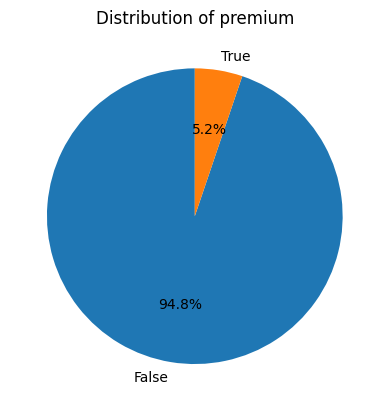

In [95]:
# Plot pie chart for 'premium' information
plt.figure()
users['premium'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['False', 'True'])
plt.title(f"Distribution of premium")
plt.ylabel('')
plt.show()

Only 5.2% of profiles are premium users.
The majority (94.8%) are using the free version.

**Creator mode** helps members access additional sharing tools, analytics and profile customization to show audiences what they're writing about on LinkedIn.

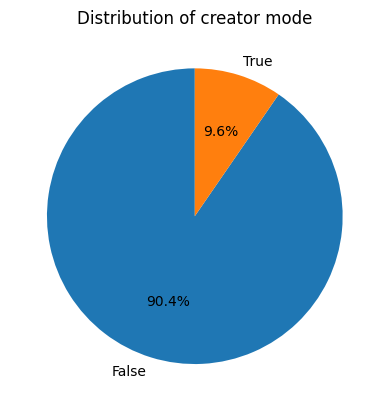

In [96]:
# Plot pie chart for 'creator' information
plt.figure()
users['creator'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['False', 'True'])
plt.title("Distribution of creator mode")
plt.ylabel('')
plt.show()

**Influencer**: A LinkedIn Influencer is a recognized thought leader who shares insights and expertise with a large audience.

**Open to Work**: The Open to Work status indicates that a user is actively seeking new job opportunities.

**Is Hiring**: The Is Hiring badge shows that a user or company is actively looking to fill job openings.

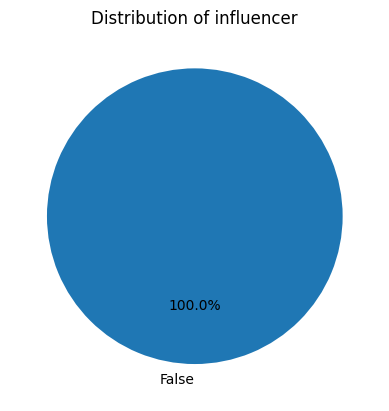

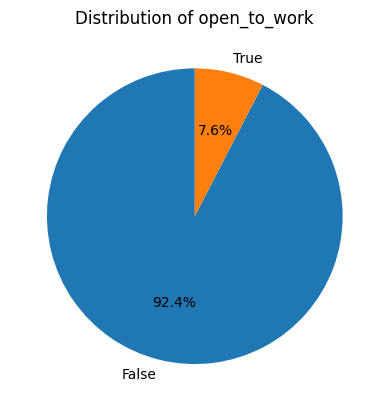

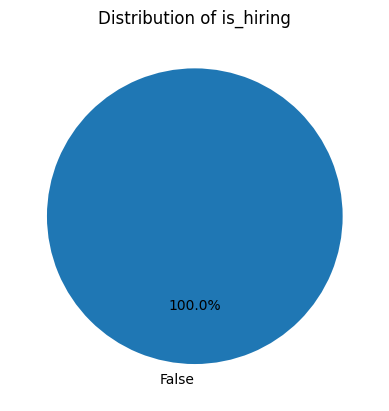

In [97]:
# Plot pie charts for specific status of profile
for col in ['influencer', 'open_to_work', 'is_hiring']:
    plt.figure()
    users[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['False', 'True'])
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()

No profiles have the "Is Hiring" flag. This is okay because the dataset focuses on job seekers rather than recruiters.

## Columns for future work

### Work info

In [86]:
users['current_position'].head(15)

,current_position
0,NaN
1,Senior Software Development Engineer
2,Руководитель проектов
3,Head of Game Development Center
4,Lead Product Manager
5,Software Engineer
6,Brigada Lead of YandexArt Analysts
7,Platform Engineer
8,Project Manager
9,Assistant Professor


In [93]:
users['current_company'].nunique()

349

In [94]:
users['current_company'].head(15)

,current_company
0,Innopolis University
1,MERKELEON
2,GISGIS
3,Университет Иннополис
4,Acronis
5,Legora (formerly Leya)
6,Yandex
7,Bitvavo
8,Eqvanta
9,Innopolis University


### Skills

In [91]:
users['top_skill_1'].unique()

array(['JavaScript', 'Solidity', 'English', 'Контент-маркетинг', 'Scrum',
       'Programming', 'Python', 'Microsoft Word',
       'Finite Element Analysis', 'Machine Learning',
       'JavaScript Libraries', 'Team Management', 'Agile Methodologies',
       'PostgreSQL', 'Android Development', 'Sales Management', 'PHP',
       'administrative support ', 'Software Development', nan, 'MatLab',
       'Start-ups', 'Testing', 'Software Engineering',
       'Project Management', 'Matlab', 'Virtualization',
       'Software Project Management', 'Computer Science', 'C++',
       'Teamwork', 'Fundraising', 'Translation', 'Professional Services',
       'Distributed Systems', 'Digital Marketing', 'Java', 'SQL',
       'Research', 'Algorithms', 'Team Leadership', 'CSS',
       'Human Resources', 'Robotics', 'Strategic Planning', 'Management',
       'Pre-sales', 'Sales', 'PL/SQL', '\uf0fc\tProject management',
       'Business Analysis', 'Leadership', 'ScribbleLive', 'Git',
       'Numerical Ana

## Future Work

### Current Problems and Future Solutions
Our dataset contains their **current and past employment, education, skills, and biographies**. However, a key challenge is that the data is **multilingual (English and Russian)** and lacks predefined categories for certain attributes like skills. To ensure accurate analysis, we need to **standardize and categorize** the data.  

- **Language Standardization:** We will use a translation API (e.g., `Google Translate API`) to convert all text into a English language.   

- **Standardizing Job Titles and Companies:** `current_position`, `current_company`, `past_company_1`, `past_company_2` have different variations of the same job title or company name(e.g., "Software Engineer" vs. "Software Developer"). We will use **Named Entity Recognition (NER)** to map similar items to standard categories (e.g., "Software Engineer" → "Software Developer").  

- **Education Standardization:**  `school_1`, `school_2`, `schools`can be listed in different formats or languages (e.g., "Harvard University" vs. "Гарвардский университет"). We will try to standardize school names using an external database (e.g., **World Higher Education Database**).

- **Skills Categorization and Grouping:** `top_skill_1`, `top_skill_2`, `top_skill_3`, `skills` are free-text entries without predefined categories. We want to create groups (e.g., mapping skills to predefined categories like "Programming", "Management", "Marketing").    



### Future Analysis Goals
Once the data is **standardized and categorized**, we can derive insights such as:  
- Top skills by industry or job title
- Most common career paths (based on past/current company)  
- School-to-career transitions
- Skill gaps in the workforce